# Read the data
https://lobsterdata.com/info/DataSamples.php

variable explanation.

Time: Seconds after midnight with decimal precision of at least milliseconds and up to nanoseconds depending on the period requested
Event Type:
1: Submission of a new limit order
2: Cancellation (partial deletion of a limit order)
3: Deletion (total deletion of a limit order)
4: Execution of a visible limit order
5: Execution of a hidden limit order
6: Indicates a cross trade, e.g. auction trade
7: Trading halt indicator (detailed information below)
Order ID: Unique order reference number
Size: Number of shares
Price: Dollar price times 10000 (i.e. a stock price of $91.14 is given by 911400)
Direction:
-1: Sell limit order
1: Buy limit order
Note: Execution of a sell (buy) limit order corresponds to a buyer (seller) initiated trade, i.e. buy (sell) trade.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

orderbook = "data/GOOG_2012-06-21_34200000_57600000_orderbook_10.csv"
message = "data/GOOG_2012-06-21_34200000_57600000_message_10.csv"

df_message = pd.read_csv(message,usecols = [0,1,3,4,5], names=['time', 'type','size','price','direction'])
df_message.head()
df_message.index = pd.Timestamp(datetime.date.today()) + pd.TimedeltaIndex(df_message.time, unit='s')
df_message.to_csv("tick.csv")

In [ ]:
############################
############################
############################
## tick level statistics
############################
############################
############################

In [2]:
# On order type: order to trade ratio: 10 to 1
df_message.groupby("type").count()[["time"]]

,time
type,
1,71258
2,19
3,64961
4,7765
5,3913


In [3]:
# orders by mins
df_message.groupby("type").count()[['time']]/6.5/60

,time
type,
1,182.712821
2,0.048718
3,166.566667
4,19.910256
5,10.033333


# limit order dynamics


In [4]:
### limit order dynamics
df_lo = df_message[df_message['type'] == 1]
df_lo.groupby('direction').agg({"time":"count","size":"sum"}).rename(columns={"time":"count"})

,count,size
direction,,
-1,37136,2174762
1,34122,2345778


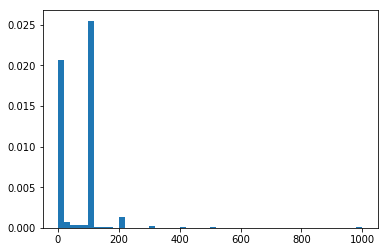

,size
count,34122.000000
mean,68.746791
std,74.427158
min,1.000000
25%,10.000000
50%,100.000000
75%,100.000000
max,2000.000000


In [5]:
df_lo_bid = df_lo[df_lo['direction'] ==1]
plt.hist(df_lo_bid['size'], 50, normed=True, range=[0, 1000])
plt.show()

# limit bid (buy) order 
df_lo_bid.describe()[["size"]]

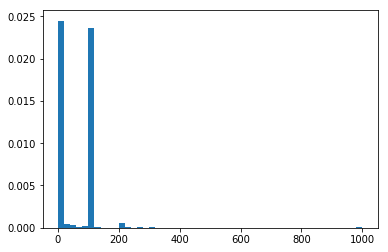

,size
count,37136.000000
mean,58.562096
std,69.253200
min,1.000000
25%,10.000000
50%,41.000000
75%,100.000000
max,2300.000000


In [6]:
df_lo_ask = df_lo[df_lo['direction'] == -1]
plt.hist(df_lo_ask['size'], 50, normed=True, range=[0, 1000])
plt.show()

# limit ask order 
df_lo_ask.describe()[["size"]]

# Trades

In [7]:
# Trades
df_trade = df_message[(df_message['type'] == 4) | (df_message['type'] == 5)] 
df_trade.to_csv('trade.csv')

In [8]:
# trading direction
df_trade.head(100)

,time,type,size,price,direction
2019-12-16 09:30:00.015105,34200.015105,4,4,5794000,1
2019-12-16 09:30:00.059902,34200.059902,4,300,5794000,1
2019-12-16 09:30:00.113247,34200.113247,5,1,5795100,1
2019-12-16 09:30:00.113247,34200.113247,5,1,5795000,1
2019-12-16 09:30:00.113247,34200.113247,5,1,5794900,1
2019-12-16 09:30:00.113247,34200.113247,5,1,5794800,1
2019-12-16 09:30:00.113247,34200.113247,4,167,5794000,1
2019-12-16 09:30:00.203135,34200.203135,4,29,5794000,1
2019-12-16 09:30:00.203135,34200.203135,4,100,5794000,1
2019-12-16 09:30:00.207763,34200.207763,4,1,5794000,-1


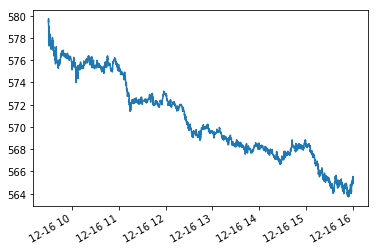

In [9]:
(df_trade['price']/10000).plot()
plt.show()

In [10]:
df_trade['return'] = (df_trade['price'].shift(-1)) - (df_trade['price'])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


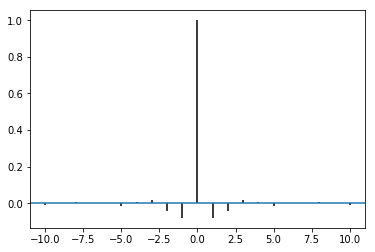

In [11]:
df_trade['return'].autocorr()
df_trade.dropna(inplace=True)
plt.acorr(df_trade['return'])
plt.show()

In [12]:
df_trade.groupby("direction").agg({"time":"count","size":"sum"})

,time,size
direction,,
-1,5808,354732
1,5869,351293


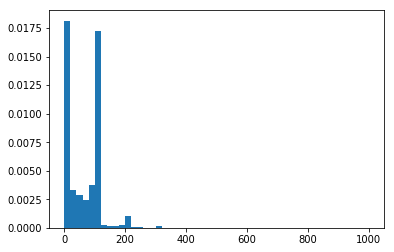

In [13]:
df_trade_bid = df_trade[df_trade['direction'] == -1]
plt.hist(df_trade_bid['size'], 50, normed=True, range=[0, 1000])
plt.show()

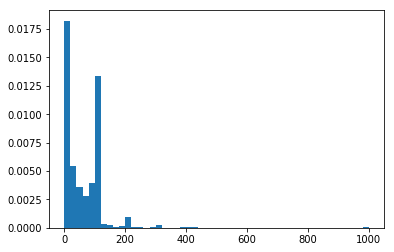

In [14]:
df_trade_ask = df_trade[df_trade['direction'] == 1]
plt.hist(df_trade_ask['size'], 50, normed=True, range=[0, 1000])
plt.show()

# re-sampling

In [15]:
message1m = df_message.resample('1min').last()
message1m.to_csv('1min.csv')
# message1s.shape
message1m['logreturn'] = np.log(message1m['price'].shift(-1)) - np.log(message1m['price'])
message1m['return'] = (message1m['price'].shift(-1)) - (message1m['price'])
message1m.dropna(inplace=True)

In [16]:
message1m.tail()

,time,type,size,price,direction,logreturn,return
2019-12-16 15:54:00,57299.760336,1,4,5639100,1,0.000089,500.0
2019-12-16 15:55:00,57359.397065,3,100,5639600,1,0.000886,5000.0
2019-12-16 15:56:00,57419.787423,1,7,5644600,-1,-0.000656,-3700.0
2019-12-16 15:57:00,57479.232971,1,100,5640900,1,0.001665,9400.0
2019-12-16 15:58:00,57539.724502,1,100,5650300,-1,0.000831,4700.0


In [17]:
def trade_sample(df_message = df_message, freq='1MIN'):
    trade_sampled = df_message.resample(freq).last()
    trade_sampled['logreturn'] = np.log(trade_sampled['price'].shift(-1)) - np.log(trade_sampled['price'])
    trade_sampled['return'] = (trade_sampled['price'].shift(-1)) - (trade_sampled['price'])
    trade_sampled.dropna(inplace=True)
    return trade_sampled 

In [129]:
trade_sample(freq='4MIN')['return'].std()

16045.79866005975

In [131]:
trade_sample(freq='81MIN')['return'].std()

61183.87587156167

In [130]:
trade_sample(freq='1MIN')['return'].std()

12547.92347958779

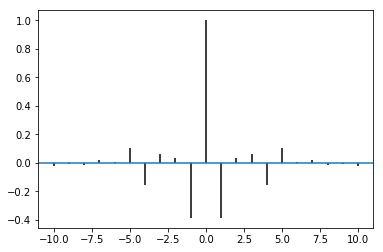

In [132]:
plt.acorr(trade_sample(freq='1MIN')['return'])
plt.show()

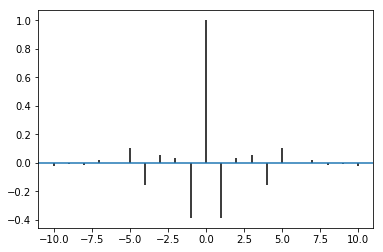

In [115]:
plt.acorr(trade_sampled['logreturn'])
plt.show()